<a href="https://colab.research.google.com/github/otwn/Data-Science-Review/blob/master/sklearn/Module3_Hyperparameter_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 3: Hyperparameter tuning

In [ ]:
!pip uninstall scikit-learn -y
!pip install scikit-learn

Uninstalling scikit-learn-0.22.2.post1:
  Successfully uninstalled scikit-learn-0.22.2.post1
     |████████████████████████████████| 22.3MB 56.2MB/s 


## Manual tuning

### Set and get Hyperparameters in scikit-learn

In [ ]:
import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/scikit-learn-mooc/")
os.listdir()

['Module1', 'scikit-learn-mooc-master', 'datasets', 'Module2', 'Module3.ipynb']

In [ ]:
import pandas as pd

adult_census = pd.read_csv("./datasets/adult-census.csv")

target_name = "class"
numerical_columns = ["age","capital-gain","capital-loss","hours-per-week"]

target = adult_census[target_name]
data = adult_census[numerical_columns]

In [ ]:
data.head()

,age,capital-gain,capital-loss,hours-per-week
0,25,0,0,40
1,38,0,0,50
2,28,0,0,40
3,44,7688,0,40
4,18,0,0,30


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression

model = Pipeline(steps=[
  ("preprocessor", StandardScaler()),
  ("classifier", LogisticRegression())
])

In [ ]:
# evaluate the statistical performance of the model via cross-validation
from sklearn.model_selection import cross_validate

cv_results = cross_validate(model, data, target)
scores = cv_results["test_score"]
print(f"Accuracy score via cross-validation:\n"
      f"{scores.mean():.3f} +/- {scores.std():.3f}")

Accuracy score via cross-validation:
0.800 +/- 0.003


In [ ]:
model.set_params(classifier__C=1e-3)
cv_results = cross_validate(model, data, target)
scores = cv_results["test_score"]
print(f"Accuracy score via cross-validation:\n"
      f"{scores.mean():.3f} +/- {scores.std():.3f}")

Accuracy score via cross-validation:
0.787 +/- 0.002


In [ ]:
# .get_params() return dict whose keys are the parameter names and
# whose values are the parameter values
for parameter in model.get_params():
  print(parameter)

memory
steps
verbose
preprocessor
classifier
preprocessor__copy
preprocessor__with_mean
preprocessor__with_std
classifier__C
classifier__class_weight
classifier__dual
classifier__fit_intercept
classifier__intercept_scaling
classifier__l1_ratio
classifier__max_iter
classifier__multi_class
classifier__n_jobs
classifier__penalty
classifier__random_state
classifier__solver
classifier__tol
classifier__verbose
classifier__warm_start


In [ ]:
model.get_params()['classifier__C']

0.001

In [ ]:
for C in [1e-3, 1e-2, 1e-1, 1, 10]:
  model.set_params(classifier__C=C)
  cv_results = cross_validate(model, data, target)
  scores = cv_results["test_score"]
  print(f"Accuracy score via cross-validation with C={C}:\n"
        f"{scores.mean():.3f} +/- {scores.std():.3f}")

Accuracy score via cross-validation with C=0.001:
0.787 +/- 0.002
Accuracy score via cross-validation with C=0.01:
0.799 +/- 0.003
Accuracy score via cross-validation with C=0.1:
0.800 +/- 0.003
Accuracy score via cross-validation with C=1:
0.800 +/- 0.003
Accuracy score via cross-validation with C=10:
0.800 +/- 0.003


## Exercise M3.01

In [ ]:
import sklearn 
sklearn.__version__

'0.24.2'

In [ ]:
import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/scikit-learn-mooc/")
os.listdir()

['Module1', 'scikit-learn-mooc-master', 'datasets', 'Module2', 'Module3.ipynb']

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

adult_census = pd.read_csv("./datasets/adult-census.csv")

target_name = "class"
target = adult_census[target_name]
data = adult_census.drop(columns=[target_name, "education-num"])

data_train, data_test, target_train, target_test = train_test_split(
    data, target, train_size=0.2, random_state=42
)

In [ ]:
from sklearn.compose import ColumnTransformer 
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OrdinalEncoder

categorical_preprocessor = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)

preprocessor = ColumnTransformer(
    [('cat-preprocessor', categorical_preprocessor, selector(dtype_include=object))],
    remainder='passthrough', sparse_threshold=0
)

# this line is currently required to import HistGradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import HistGradientBoostingClassifier 
from sklearn.pipeline import Pipeline

model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", HistGradientBoostingClassifier(random_state=42))
])

In [ ]:
model.get_params()

{'classifier': HistGradientBoostingClassifier(random_state=42),
 'classifier__categorical_features': None,
 'classifier__early_stopping': 'auto',
 'classifier__l2_regularization': 0.0,
 'classifier__learning_rate': 0.1,
 'classifier__loss': 'auto',
 'classifier__max_bins': 255,
 'classifier__max_depth': None,
 'classifier__max_iter': 100,
 'classifier__max_leaf_nodes': 31,
 'classifier__min_samples_leaf': 20,
 'classifier__monotonic_cst': None,
 'classifier__n_iter_no_change': 10,
 'classifier__random_state': 42,
 'classifier__scoring': 'loss',
 'classifier__tol': 1e-07,
 'classifier__validation_fraction': 0.1,
 'classifier__verbose': 0,
 'classifier__warm_start': False,
 'memory': None,
 'preprocessor': ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                   transformers=[('cat-preprocessor',
                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                 unknown_value=-1),
                

In [ ]:
from sklearn.model_selection import cross_val_score

learning_rate = [0.01, 0.1, 1, 10]
max_leaf_nodes = [3, 10, 30]

best_score = 0
best_params = {}

for lr in learning_rate:
  for nodes in max_leaf_nodes:
    print(f"Evaluating model with leaning rate: {lr:.3f}"
          f" and max leaf nodes {nodes}...", end="")
    model.set_params(
        classifier__learning_rate = lr,
        classifier__max_leaf_nodes = nodes
    )
    scores = cross_val_score(model, data_train, target_train, cv=2)
    mean_score = scores.mean()
    print(f"score: {mean_score:.3f}")
    if mean_score > best_score:
      best_score = mean_score
      best_params = {'learning-rate':lr, 'max leaf nodes': nodes}
      print(f"Best model with score {best_score:.3f}")

print(f"The best accuracy obtained is {best_score:.3f}")
print(f"The best parameters found are:\n {best_params}")

Evaluating model with leaning rate: 0.010 and max leaf nodes 3...score: 0.789
Best model with score 0.789
Evaluating model with leaning rate: 0.010 and max leaf nodes 10...score: 0.813
Best model with score 0.813
Evaluating model with leaning rate: 0.010 and max leaf nodes 30...score: 0.842
Best model with score 0.842
Evaluating model with leaning rate: 0.100 and max leaf nodes 3...score: 0.847
Best model with score 0.847
Evaluating model with leaning rate: 0.100 and max leaf nodes 10...score: 0.859
Best model with score 0.859
Evaluating model with leaning rate: 0.100 and max leaf nodes 30...score: 0.857
Evaluating model with leaning rate: 1.000 and max leaf nodes 3...score: 0.852
Evaluating model with leaning rate: 1.000 and max leaf nodes 10...score: 0.833
Evaluating model with leaning rate: 1.000 and max leaf nodes 30...score: 0.828
Evaluating model with leaning rate: 10.000 and max leaf nodes 3...score: 0.288
Evaluating model with leaning rate: 10.000 and max leaf nodes 10...score:

## Hyperparameter tuning by grid-search

In [ ]:
import os 
os.chdir("/content/drive/MyDrive/Colab Notebooks/scikit-learn-mooc/")
os.listdir()

['Module1', 'scikit-learn-mooc-master', 'datasets', 'Module2', 'Module3.ipynb']

In [ ]:
from sklearn import set_config
set_config(display="diagram")

In [ ]:
import pandas as pd 
adult_census = pd.read_csv("./datasets/adult-census.csv")

In [ ]:
target_name = "class"
target = adult_census[target_name]
target

0         <=50K
1         <=50K
2          >50K
3          >50K
4         <=50K
          ...  
48837     <=50K
48838      >50K
48839     <=50K
48840     <=50K
48841      >50K
Name: class, Length: 48842, dtype: object

In [ ]:
data = adult_census.drop(columns=[target_name, "education-num"])
data.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,?,Some-college,Never-married,?,Own-child,White,Female,0,0,30,United-States


In [ ]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=42
)

In [ ]:
from sklearn.compose import make_column_selector as selector 

categorical_column_selector = selector(dtype_include=object)
categorical_columns = categorical_column_selector(data)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder 
categorical_preprocessor = OrdinalEncoder(handle_unknown="use_encoded_value",
                                          unknown_value=-1)

In [ ]:
# use a column transformer with code to select the categorical columns
# and apply to them the ordinal encoder
from sklearn.compose import ColumnTransformer 
preprocessor = ColumnTransformer([
    ('cat-preprocessor', categorical_preprocessor, categorical_columns)
], remainder='passthrough', sparse_threshold=0)

In [ ]:
# for the moment this line is required to import HistGradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.pipeline import Pipeline

model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", HistGradientBoostingClassifier(random_state=42, max_leaf_nodes=4))
])

In [ ]:
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('cat-preprocessor',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native-country'])])),
                ('classifier',
                 HistGradientBoostingClassifier(max_leaf_nodes=4,
                                                random_state=42))])

### Turning using a grid-search

In [ ]:
# Instead of manullay writing the two for-loops, scikit-learn provides a class called
# GridSearchCV which implement the exhaustive search implemented during the exercise

%%time
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier__learning_rate': (0.05, 0.1, 0.5, 1, 5),
    'classifier__max_leaf_nodes': (3,10,30,100)
}
model_grid_search = GridSearchCV(model, param_grid=param_grid, n_jobs=4, cv=2)
model_grid_search.fit(data_train, target_train)
accuracy = model_grid_search.score(data_test, target_test)

CPU times: user 3.09 s, sys: 142 ms, total: 3.23 s
Wall time: 19.3 s


In [ ]:
print(f"The test accuracy score of the grid-searched peipline is: "
      f"{accuracy:.2f}")

The test accuracy score of the grid-searched peipline is: 0.88


In [ ]:
# The GridSearchCV estimator takes a param_grid parameter which defines all hyperparameters 
# and their associated values. 
# The grid-search will be in charge of creating all possible combinations and test them.

model_grid_search.predict(data_test.iloc[0:5])

array([' <=50K', ' <=50K', ' >50K', ' <=50K', ' >50K'], dtype=object)

In [ ]:
print(f"The best set of parameters is; "
      f"{model_grid_search.best_params_}")

The best set of parameters is; {'classifier__learning_rate': 0.1, 'classifier__max_leaf_nodes': 30}


In [ ]:
cv_results = pd.DataFrame(model_grid_search.cv_results_).sort_values(
    "mean_test_score", ascending=False
)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__learning_rate,param_classifier__max_leaf_nodes,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
6,1.683857,0.128201,0.560606,0.026366,0.1,30,"{'classifier__learning_rate': 0.1, 'classifier...",0.868912,0.867213,0.868063,0.000850,1
2,2.077280,0.009508,0.687659,0.006206,0.05,30,"{'classifier__learning_rate': 0.05, 'classifie...",0.868530,0.866667,0.867598,0.000932,2
10,0.645126,0.019899,0.227526,0.015699,0.5,30,"{'classifier__learning_rate': 0.5, 'classifier...",0.867056,0.865902,0.866479,0.000577,3
5,1.284307,0.052515,0.560694,0.029958,0.1,10,"{'classifier__learning_rate': 0.1, 'classifier...",0.866783,0.866066,0.866425,0.000359,4
8,0.907230,0.005608,0.403867,0.003190,0.5,3,"{'classifier__learning_rate': 0.5, 'classifier...",0.864872,0.866776,0.865824,0.000952,5


In [ ]:
# get the parameter names
column_results = [f"param_{name}" for name in param_grid.keys()]
column_results += [
    "mean_test_score", "std_test_score", "rank_test_score"]
cv_results = cv_results[column_results]

In [ ]:
def shorten_param(param_name):
  if "__" in param_name:
    return param_name.rsplit("__", 1)[1]
  return param_name

cv_results = cv_results.rename(shorten_param, axis=1)
cv_results

,learning_rate,max_leaf_nodes,mean_test_score,std_test_score,rank_test_score
6,0.1,30,0.868063,0.000850,1
2,0.05,30,0.867598,0.000932,2
10,0.5,30,0.866479,0.000577,3
5,0.1,10,0.866425,0.000359,4
8,0.5,3,0.865824,0.000952,5
9,0.5,10,0.865824,0.000031,6
3,0.05,100,0.865797,0.001259,7
7,0.1,100,0.864732,0.000795,8
1,0.05,10,0.862029,0.000222,9
11,0.5,100,0.859491,0.001069,10


In [ ]:
pivoted_cv_results = cv_results.pivot_table(
    values="mean_test_score", index=["learning_rate"],
    columns=["max_leaf_nodes"]
)
pivoted_cv_results

max_leaf_nodes,3,10,30,100
learning_rate,,,,
0.05,0.827196,0.862029,0.867598,0.865797
0.10,0.853266,0.866425,0.868063,0.864732
0.50,0.865824,0.865824,0.866479,0.859491
1.00,0.857389,0.858863,0.851028,0.835194
5.00,0.283476,0.527527,0.638062,0.727579


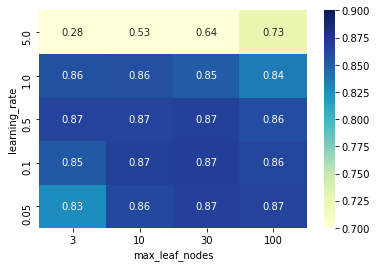

In [ ]:
import seaborn as sns

ax = sns.heatmap(pivoted_cv_results, annot=True, cmap="YlGnBu", vmin=0.7, vmax=0.9)
ax.invert_yaxis()

The above tables highlights the following things:

- for too high values of learning_rate, the statistical performance of the model is degraded and adjusting the value of max_leaf_nodes cannot fix that problem;
- outside of this pathological region, we observe that the optimal choice of max_leaf_nodes depends on the value of learning_rate;
- in particular, we observe a "diagonal" of good models with an accuracy close to the maximal of 0.87: when the value of max_leaf_nodes is increased, one should increase the value of learning_rate accordingly to preserve a good accuracy.

The precise meaning of those two parameters will be explained in a latter notebook.

For now we will note that, in general, there is no unique optimal parameter setting: 6 models out of the 16 parameter configuration reach the maximal accuracy (up to small random fluctuations caused by the sampling of the training set).

## Hyperparameter tuning by randomized-search

Grid-search approach to search for the best hyperparameters maximizing the statistical performance of a predictive model

However, a grid-search approach has limitations. It does not scale when the number of parameters to tune is icreasing. Also, the grid will imposed a regularity during the search which might be problematic.

In [ ]:
from sklearn import set_config
set_config(display="diagram")

In [ ]:
import pandas as pd
adult_census = pd.read_csv("./datasets/adult-census.csv")

In [ ]:
target_name = "class"
target = adult_census[target_name]
target

0         <=50K
1         <=50K
2          >50K
3          >50K
4         <=50K
          ...  
48837     <=50K
48838      >50K
48839     <=50K
48840     <=50K
48841      >50K
Name: class, Length: 48842, dtype: object

In [ ]:
data = adult_census.drop(columns=[target_name, "education-num"])
data.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,?,Some-college,Never-married,?,Own-child,White,Female,0,0,30,United-States


In [ ]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=42
)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_selector as selector

categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(data)

categorical_preprocessor = OrdinalEncoder(handle_unknown="use_encoded_value",
                                          unknown_value=-1)
preprocessor = ColumnTransformer([
    ('cat-preprocessor', categorical_preprocessor, categorical_columns)
], remainder='passthrough', sparse_threshold=0)

In [ ]:
# for the moment this line is required to import HistGradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.pipeline import Pipeline

model = Pipeline([
      ("preprocessor", preprocessor),
      ("classifier", HistGradientBoostingClassifier(random_state=42, max_leaf_nodes=4))
])

model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('cat-preprocessor',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native-country'])])),
                ('classifier',
                 HistGradientBoostingClassifier(max_leaf_nodes=4,
                                                random_state=42))])

### Tuning using a randomized-search

we can randomly generate the parameter candidates. Indeed, such approach avoids the regularity of the grid. Hence, adding more evaluations can increase the resolution in each direction.



In [ ]:
from scipy.stats import loguniform 

class loguniform_int:
  """Integer valued version of the log-uniform distribution"""
  def __init__(self, a, b):
    self._distribution = loguniform(a, b)
  
  def rvs(self, *args, **kwargs):
    """Random variable sample"""
    return self._distribution.rvs(*args, **kwargs).astype(int)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV 

param_distributions = {
    'classifier__l2_regularization': loguniform(1e-6, 1e3),
    'classifier__learning_rate': loguniform(0.001, 10),
    'classifier__max_leaf_nodes': loguniform_int(2, 256),
    'classifier__min_samples_leaf': loguniform_int(1, 100),
    'classifier__max_bins': loguniform_int(2, 255)
}

model_random_search = RandomizedSearchCV(
    model, param_distributions=param_distributions,
    n_iter=10, n_jobs=4, cv=5
)

model_random_search.fit(data_train, target_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                sparse_threshold=0,
                                                                transformers=[('cat-preprocessor',
                                                                               OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                              unknown_value=-1),
                                                                               ['workclass',
                                                                                'education',
                                                                                'marital-status',
                                                                                'occupation',
                                                                                'relationship',
                                                                                'race',
                                                                                'sex',
                                                                                'native-country'])])),
                                             ('classifier',
                                              Hi...
                   param_distributions={'classifier__l2_regularization': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff8204a8b50>,
                                        'classifier__learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff81f0962d0>,
                                        'classifier__max_bins': <__main__.loguniform_int object at 0x7ff81cc8a5d0>,
                                        'classifier__max_leaf_nodes': <__main__.loguniform_int object at 0x7ff81dcd2990>,
                                        'classifier__min_samples_leaf': <__main__.loguniform_int object at 0x7ff81cc8acd0>})

In [ ]:
# Then we can computer the accuracy score on the test set

accuracy = model_random_search.score(data_test, target_test)
print(f"The test accuracy score of the best model is "
      f"{accuracy:.2f}")

The test accuracy score of the best model is 0.86


In [ ]:
from pprint import pprint
print("The best parameters are:")
pprint(model_random_search.best_params_)

The best parameters are:
{'classifier__l2_regularization': 0.004736063558768177,
 'classifier__learning_rate': 0.29848378334708714,
 'classifier__max_bins': 28,
 'classifier__max_leaf_nodes': 44,
 'classifier__min_samples_leaf': 41}


In [ ]:
# inspect the results using the attributes cv_results as we previously did
def shorten_param(param_name):
    if "__" in param_name:
        return param_name.rsplit("__", 1)[1]
    return param_name

In [ ]:
# get the parameter names
column_results = [
    f"param_{name}" for name in param_distributions.keys()
]
column_results += ["mean_test_score", "std_test_score","rank_test_score"]

cv_results = pd.DataFrame(model_random_search.cv_results_)
cv_results = cv_results[column_results].sort_values(
    "mean_test_score", ascending=False
)
cv_results = cv_results.rename(shorten_param, axis=1)
cv_results

,l2_regularization,learning_rate,max_leaf_nodes,min_samples_leaf,max_bins,mean_test_score,std_test_score,rank_test_score
2,0.00473606,0.298484,44,41,28,0.853867,0.002367,1
9,0.000452638,0.0172258,12,20,8,0.831509,0.001536,2
5,0.181838,0.0221085,6,47,233,0.828943,0.005888,3
4,4.52452e-06,0.03083,3,4,183,0.817914,0.001842,4
1,45.4076,0.00880951,141,53,242,0.816358,0.002183,5
7,0.000446355,0.00510538,7,62,19,0.788267,0.002129,6
8,0.0010475,0.00593129,202,34,3,0.776037,0.001602,7
6,0.0147932,0.00335512,10,2,103,0.758947,0.000013,8
0,0.0107179,2.42611,149,79,10,0.743086,0.038584,9
3,60.5169,4.78193,23,82,101,0.741995,0.019251,10


In [ ]:
cv_results = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/scikit-learn-mooc/scikit-learn-mooc-master/figures/randomized_search_results.csv",
                         index_col=0)
(cv_results[column_results].rename(
    shorten_param, axis=1).sort_values("mean_test_score"))

,l2_regularization,learning_rate,max_leaf_nodes,min_samples_leaf,max_bins,mean_test_score,std_test_score,rank_test_score
357,0.000026,3.075318,3,68,31,0.241053,0.000013,500
200,0.000444,6.236325,2,2,30,0.344629,0.207156,499
413,0.000001,8.828574,64,1,144,0.448205,0.253714,497
344,0.000003,7.091079,5,1,95,0.448205,0.253714,497
232,0.000097,9.976823,28,5,3,0.448205,0.253714,496
...,...,...,...,...,...,...,...,...
327,4.733808,0.036786,61,5,241,0.869673,0.002417,5
328,2.036232,0.224702,28,49,236,0.869837,0.000808,4
21,4.994918,0.077047,53,7,192,0.870793,0.001993,3
343,0.000404,0.244503,15,15,229,0.871339,0.002741,2


In [ ]:
import numpy as np
import plotly.express as px

fig = px.parallel_coordinates(
    cv_results.rename(shorten_param, axis=1).apply({
        "learning_rate": np.log10,
        "max_leaf_nodes": np.log2,
        "max_bins": np.log2,
        "min_samples_leaf": np.log10,
        "l2_regularization": np.log10,
        "mean_test_score": lambda x: x}),
    color="mean_test_score",
    color_continuous_scale=px.colors.sequential.Viridis,
)
fig.show()

## Cross-validation and hyperparameter tuning

We saw two approaches to tune hyperparameters so far: via grid-search and randomized-search

We will show how to combine such hyperparameters search with a cross-validation

### Our predictive model

In [ ]:
import sklearn
sklearn.__version__

'0.24.2'

In [ ]:
from sklearn import set_config
set_config(display="diagram")

In [ ]:
import pandas as pd 
adult_census = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/scikit-learn-mooc/datasets/adult-census.csv")

In [ ]:
target_name = "class"
target = adult_census[target_name]
target

0         <=50K
1         <=50K
2          >50K
3          >50K
4         <=50K
          ...  
48837     <=50K
48838      >50K
48839     <=50K
48840     <=50K
48841      >50K
Name: class, Length: 48842, dtype: object

In [ ]:
data = adult_census.drop(columns=[target_name, "education-num"])
data.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,?,Some-college,Never-married,?,Own-child,White,Female,0,0,30,United-States


In [ ]:
# split it into a training and testing sets
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(data, target, random_state=42)

In [ ]:
# create the same predictive pipeline as seen in the grid-search section
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_selector as selector 

categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(data)

categorical_preprocessor = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)

preprocessor = ColumnTransformer([
    ('cat-preprocessor', categorical_preprocessor, categorical_columns)
], remainder="passthrough", sparse_threshold=0)

In [ ]:
# for the moment this line is required to import HistGradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.pipeline import Pipeline

model = Pipeline([ 
    ("preprocessor", preprocessor),
    ("classifier", HistGradientBoostingClassifier(random_state=42, max_leaf_nodes=4))
])
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('cat-preprocessor',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native-country'])])),
                ('classifier',
                 HistGradientBoostingClassifier(max_leaf_nodes=4,
                                                random_state=42))])

### Include a hyperparameter search within a cross-validation

As mentioned earlier, using a single train-test split during the grid-search does not give any information regarding the different sources of variations: variations in terms of test score or hyperparameters values.

To get reliable information, the hyperparameters search need to be nested within a cross-validation.

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

param_grid = {
    "classifier__learning_rate": (0.05, 0.1),
    "classifier__max_leaf_nodes": (30, 40)
}
model_grid_search = GridSearchCV(model, param_grid = param_grid, n_jobs=4, cv=2)

cv_results = cross_validate(model_grid_search, data, target, cv=3, return_estimator=True)

In [ ]:
scores = cv_results["test_score"]
print(f"Accuracy score by cross-validation combined with hyperparameters "
      f"search:\n{scores.mean():.3f} +/- {scores.std():.3f}")

Accuracy score by cross-validation combined with hyperparameters search:
0.872 +/- 0.002


In [ ]:
# the hyperparamters on each fold are pontentially different since we nested the grid-search
# in the cross-validation. Thus, checking the variation of the hyperparameters across folds
# should also be analyzed
for fold_idx, estimator in enumerate(cv_results["estimator"]):
  print(f"Best parameter found on fold#{fold_idx+1}")
  print(f"{estimator.best_params_}")

Best parameter found on fold#1
{'classifier__learning_rate': 0.1, 'classifier__max_leaf_nodes': 40}
Best parameter found on fold#2
{'classifier__learning_rate': 0.1, 'classifier__max_leaf_nodes': 30}
Best parameter found on fold#3
{'classifier__learning_rate': 0.05, 'classifier__max_leaf_nodes': 30}


## Exercise M3.02

In [ ]:
# !pip uninstall scikit-learn
# !pip install scikit-learn
import sklearn 
sklearn.__version__

'0.24.2'

In [ ]:
import numpy as np 
import pandas as pd

adult_census = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/scikit-learn-mooc/datasets/adult-census.csv")

target_name = "class"
target = adult_census[target_name]
data = adult_census.drop(columns=[target_name, "education-num"])

from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(data, target, random_state=42)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer 
from sklearn.compose import make_column_selector as selector 
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression


In [ ]:
numerical_preprocessor = StandardScaler()
numerical_columns_selector = selector(dtype_exclude=object)
numerical_columns = numerical_columns_selector(data)

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(data)

preprocessor = ColumnTransformer(
    [('num-preprocessor', numerical_preprocessor, numerical_columns),
     ('cat-preprocessor', categorical_preprocessor, categorical_columns)],
    remainder='passthrough', sparse_threshold=0
)

model = make_pipeline(preprocessor, LogisticRegression())

In [ ]:
model.get_params()

{'columntransformer': ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                   transformers=[('num-preprocessor', StandardScaler(),
                                  ['age', 'capital-gain', 'capital-loss',
                                   'hours-per-week']),
                                 ('cat-preprocessor',
                                  OneHotEncoder(handle_unknown='ignore'),
                                  ['workclass', 'education', 'marital-status',
                                   'occupation', 'relationship', 'race', 'sex',
                                   'native-country'])]),
 'columntransformer__cat-preprocessor': OneHotEncoder(handle_unknown='ignore'),
 'columntransformer__cat-preprocessor__categories': 'auto',
 'columntransformer__cat-preprocessor__drop': None,
 'columntransformer__cat-preprocessor__dtype': numpy.float64,
 'columntransformer__cat-preprocessor__handle_unknown': 'ignore',
 'columntransformer__cat-preprocessor__sparse': Tr

In [ ]:
from sklearn.model_selection import RandomizedSearchCV 
from scipy.stats import loguniform

param_distributions = {
    'logisticregression__C': loguniform(0.001, 10),
    'columntransformer__num-preprocessor__with_mean':[True, False],
    'columntransformer__num-preprocessor__with_std':[True, False],
}

model_random_search = RandomizedSearchCV(
    model, param_distributions=param_distributions,
    n_iter=20, error_score=np.nan, n_jobs=2, verbose=1, random_state=1
)

model_random_search.fit(data_train, target_train)
model_random_search.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'columntransformer__num-preprocessor__with_mean': True,
 'columntransformer__num-preprocessor__with_std': True,
 'logisticregression__C': 2.1802318892988515}

In [ ]:
from sklearn.model_selection import GridSearchCV
?GridSearchCV

# Wrap-up quiz 3

In [ ]:
import pandas as pd

penguins = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/scikit-learn-mooc/scikit-learn-mooc-master/datasets/penguins.csv")

columns = ["Body Mass (g)", "Flipper Length (mm)", "Culmen Length (mm)"]
target_name = "Species"

# Remove lines with missing values for the columns of interestes
penguins_non_missing = penguins[columns + [target_name]].dropna()

data = penguins_non_missing[columns]
target = penguins_non_missing[target_name]

In [ ]:
penguins.isnull().sum()

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               290
dtype: int64

In [ ]:
penguins.describe()

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,344.000000,342.000000,342.000000,342.000000,342.000000,330.000000,331.000000
mean,63.151163,43.921930,17.151170,200.915205,4201.754386,8.733382,-25.686292
std,40.430199,5.459584,1.974793,14.061714,801.954536,0.551770,0.793961
min,1.000000,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540
25%,29.000000,39.225000,15.600000,190.000000,3550.000000,8.299890,-26.320305
50%,58.000000,44.450000,17.300000,197.000000,4050.000000,8.652405,-25.833520
75%,95.250000,48.500000,18.700000,213.000000,4750.000000,9.172123,-25.062050
max,152.000000,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.787670


In [ ]:
target.value_counts()

Adelie Penguin (Pygoscelis adeliae)          151
Gentoo penguin (Pygoscelis papua)            123
Chinstrap penguin (Pygoscelis antarctica)     68
Name: Species, dtype: int64

## Qeustion 2

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
model = Pipeline(steps=[
    ("preprocessor", StandardScaler()),
    ("classifier", KNeighborsClassifier(n_neighbors=5)),
])

In [ ]:
model.get_params()

{'classifier': KNeighborsClassifier(),
 'classifier__algorithm': 'auto',
 'classifier__leaf_size': 30,
 'classifier__metric': 'minkowski',
 'classifier__metric_params': None,
 'classifier__n_jobs': None,
 'classifier__n_neighbors': 5,
 'classifier__p': 2,
 'classifier__weights': 'uniform',
 'memory': None,
 'preprocessor': StandardScaler(),
 'preprocessor__copy': True,
 'preprocessor__with_mean': True,
 'preprocessor__with_std': True,
 'steps': [('preprocessor', StandardScaler()),
  ('classifier', KNeighborsClassifier())],
 'verbose': False}

In [ ]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(model, data, target, cv=10, scoring="balanced_accuracy")

In [ ]:
cv_results["test_score"].mean()

0.9521978021978021

In [ ]:
model.set_params(classifier__n_neighbors=51)
cv_results = cross_validate(model, data, target, cv=10, scoring="balanced_accuracy")
cv_results["test_score"].mean()

0.9418803418803419

In [ ]:
model.set_params(preprocessor=None, classifier__n_neighbors=5)
cv_results = cross_validate(model, data, target, cv=10, scoring="balanced_accuracy")
cv_results["test_score"].mean()

0.7398382173382173

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer


all_preprocessors = [
    None,
    StandardScaler(),
    MinMaxScaler(),
    QuantileTransformer(n_quantiles=100),
    PowerTransformer(method="box-cox"),
]

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

param_grid = {
    "preprocessor": all_preprocessors,
    "classifier__n_neighbors": [5, 51, 101]
}
model_grid_search = GridSearchCV(model, param_grid = param_grid, n_jobs=4, cv=10)

cv_results = cross_validate(model_grid_search, data, target, cv=10, return_estimator=True)

In [ ]:
cv_results

{'estimator': [GridSearchCV(cv=10,
               estimator=Pipeline(steps=[('preprocessor', None),
                                         ('classifier', KNeighborsClassifier())]),
               n_jobs=4,
               param_grid={'classifier__n_neighbors': [5, 51, 101],
                           'preprocessor': [None, StandardScaler(),
                                            MinMaxScaler(),
                                            QuantileTransformer(n_quantiles=100),
                                            PowerTransformer(method='box-cox')]}),
  GridSearchCV(cv=10,
               estimator=Pipeline(steps=[('preprocessor', None),
                                         ('classifier', KNeighborsClassifier())]),
               n_jobs=4,
               param_grid={'classifier__n_neighbors': [5, 51, 101],
                           'preprocessor': [None, StandardScaler(),
                                            MinMaxScaler(),
                                        

In [ ]:
for fold_idx, estimator in enumerate(cv_results["estimator"]):
  print(f"Best parameter found on fold#{fold_idx+1}")
  print(f"{estimator.best_params_}")

Best parameter found on fold#1
{'classifier__n_neighbors': 5, 'preprocessor': QuantileTransformer(n_quantiles=100)}
Best parameter found on fold#2
{'classifier__n_neighbors': 5, 'preprocessor': QuantileTransformer(n_quantiles=100)}
Best parameter found on fold#3
{'classifier__n_neighbors': 5, 'preprocessor': StandardScaler()}
Best parameter found on fold#4
{'classifier__n_neighbors': 51, 'preprocessor': StandardScaler()}
Best parameter found on fold#5
{'classifier__n_neighbors': 51, 'preprocessor': StandardScaler()}
Best parameter found on fold#6
{'classifier__n_neighbors': 5, 'preprocessor': QuantileTransformer(n_quantiles=100)}
Best parameter found on fold#7
{'classifier__n_neighbors': 5, 'preprocessor': MinMaxScaler()}
Best parameter found on fold#8
{'classifier__n_neighbors': 5, 'preprocessor': StandardScaler()}
Best parameter found on fold#9
{'classifier__n_neighbors': 5, 'preprocessor': StandardScaler()}
Best parameter found on fold#10
{'classifier__n_neighbors': 5, 'preprocessor

In [ ]:
import seaborn as sns

cv_results["test_score"].mean()
# ax = sns.heatmap(pivoted_cv_results, annot=True, cmap="YlGnBu", vmin=0.7, vmax=0.9)
# ax.invert_yaxis()

0.9502521008403362